# Tarea
1. una expliación de las condiciones para la Matriz para aplicar mínimos cuadrados

El problema de mínimos cuadrados tiene sentido cuando el vector de resultados $b \in \mathbb{R}^m $ es del espacio columna de la Matriz $A$. Ahora, si $A$ no es invertible, pero $rank(A)=m$ y $Null(A)=0$ , es decir, si $A$ tiene columnas LI ( quizá no suficientes), entonces el sitema $A^{T}Ax=A^{T}b$ tiene solución única pues $(A^{T}A)^-1$ existe bajo esas condiciones. ( Observe que  $(AA^{T})^-1$ no).
En realidad siempre que podamos calcular la pseudo inversa de la matriz $\Sigma$ de la facotrización SVD de A, podremos resolver mínimos cuadrados. Note que $A^{+}= V\Sigma^{+}U^{T}$
\\
Casos problematicos podrian ocurrir si las columnas de $A$ son casi LD, Para ese caso, un algoritmo de Graham-Schmidt buscando su ortogonalización, para obtener la factorización QR.\\
Si $A$ es casi- singular, tendiramos que $\|(Ax-b)\| \rightarrow 0$ y los valores singulares de $A$ serian muy cercanos al cero, es decir si $det(A)\rightarrow 0$, entonces $det(\Sigma)\rightarrow 0$ y calcular $\Sigma^{+}$ seria computacionalmente costoso, es por esto que las matrices ideales para el computo de mínimos cuadrados son las definidas-positivas, donde los valores propios son todos positivos y bien relatcionados. 

# 2, apliquemos un modelo no lineal para predecir el precio del BTC 
En este caso, aplicare un modelo exponencial basado en la distribucion normal. A saber 


$$y = \frac{A}{\sigma\sqrt(2\pi)}e^(\frac{(x-u)^2}{2\sigma^2})$$\\
escalando el modelo con el logaritmo natural, obtenemos 3 paramettros a determinar  \\
            $$ln(y)=ln(\frac{A}{\sigma\sqrt(2\pi)})-\frac{u^2}{2\sigma^2}+\frac{u}{\sigma^2}x-\frac{1}{2\sigma^2}x^2 $$\\
            así mi vector de incognitas será $\beta=(ln(\frac{A}{\sigma\sqrt(2\pi)})-\frac{u^2}{2\sigma^2},\frac{u^2}{2\sigma^2}+\frac{u}{\sigma^2},\frac{1}{2\sigma^2} )$ \\
            Usaré un paquete para solucionar problemas no lineales que encontré en  https://juliasmoothoptimizers.github.io

In [2]:
#### vamos a recoger los datos###
using CSV

using DataFrames


dataBitcoin = CSV.read("BTC.csv", DataFrame); ###Data del precio del BTC
dataGold =CSV.read("GOLD.csv", DataFrame); ### Precio oro
dataSilver= CSV.read("SILVER.csv", DataFrame); ### precio plata
dataOil = CSV.read("OIL.csv", DataFrame); ## precio Oil

In [3]:
dataBitcoin."Close/Last";#float estos vectores estan ordenados al reves de la ultima fecha a la más antigua
dataGold."Close/Last";#float
dataSilver."Close/Last";#float
dataOil."Close/Last";#float
using LinearAlgebra
N=size(dataBitcoin."Close/Last");
BTC=zeros(N[1]-7,1);#Estoy quitandole los ultimos 7 días para no considerarlos
for i in 1:N[1]-7
    
    BTC[i,]=dataBitcoin."Close/Last"[N[1]-(i-1),] #reordenando la información
end
BTC;
X= Array((1:length(BTC))); #dias del año
Y=BTC;

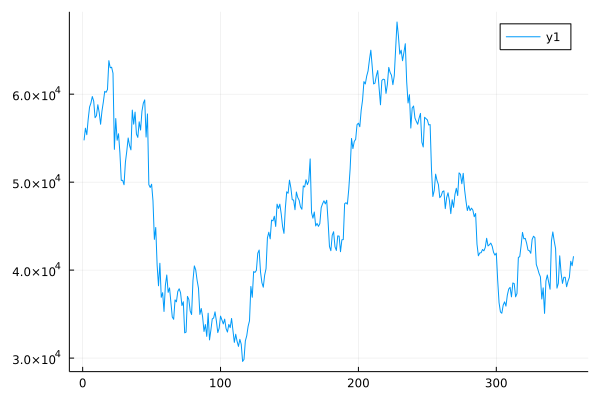

Your GR installation is incomplete. Rerunning build step for GR package.


┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423
ERROR: LoadError: InitError: could not load library "/Users/j1/.julia/artifacts/d594d9e68b9d104aaf1a41d933728d2dad54c869/lib/QtConcurrent.framework/Versions/5/QtConcurrent"
dlopen(/Users/j1/.julia/artifacts/d594d9e68b9d104aaf1a41d933728d2dad54c869/lib/QtConcurrent.framework/Versions/5/QtConcurrent.dylib, 1): image not found
Stacktrace:
  [1] dlopen(s::String, flags::UInt32; throw_error::Bool)
    @ Base.Libc.Libdl ./libdl.jl:117
  [2] dlopen(s::String, flags::UInt32)
    @ Base.Libc.Libdl ./libdl.jl:117
  [3] macro expansion
    @ ~/.julia/packages/JLLWrappers/QpMQW/src/products/library_generators.jl:54 [inlined]
  [4] __init__()
    @ Qt5Base_jll ~/.julia/packages/Qt5Base_jll/lSI9g/src/wrappers/x86_64-apple-darwin.jl:31
  [5] _include_from_serialized(path::String, depmods::Vector{Any})
    @ Base ./loading.jl:768
  [6] _require_search_from_serialized(pkg::Base.PkgId, sourcepath::String)
    @ B

In [4]:
using Plots
plot(BTC)

In [5]:
using Pkg
Pkg.add("NLPModels")
Pkg.add("NLPModelsJuMP")
Pkg.add("JuMP")
Pkg.add("JSOSolvers")
Pkg.add("CaNNOLeS")
Pkg.status


#paquetes para optmización no lineal

    


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed FastClosures ────── v0.3.2
   Installed AMD ─────────────── v0.4.0
   Installed ExprTools ───────── v0.1.8
   Installed LinearOperators ─── v2.2.3
   Installed TimerOutputs ────── v0.5.16
   Installed NLPModels ───────── v0.18.3
   Installed LDLFactorizations ─ v0.8.1
    Updating `~/.julia/environments/v1.7/Project.toml`
  [a4795742] + NLPModels v0.18.3
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [14f7f29c] + AMD v0.4.0
  [e2ba6199] + ExprTools v0.1.8
  [9aa1b823] + FastClosures v0.3.2
  [40e66cde] + LDLFactorizations v0.8.1
  [5c8ed15e] + LinearOperators v2.2.3
  [a4795742] + NLPModels v0.18.3
  [a759f4b9] + TimerOutputs v0.5.16
Precompiling project...
  ✓ FastClosures
  ✓ ExprTools
  ✓ AMD
  ✓ LDLFactorizations
  ✓ TimerOutputs
  ✓ LinearOperators
  ✓ GR
  ✓ NLPModels
  ✓ Plots
  9 dependencies successfully precompiled in 59 seconds (144 already precompiled, 1 skip

status (generic function with 8 methods)

In [6]:
using JSOSolvers

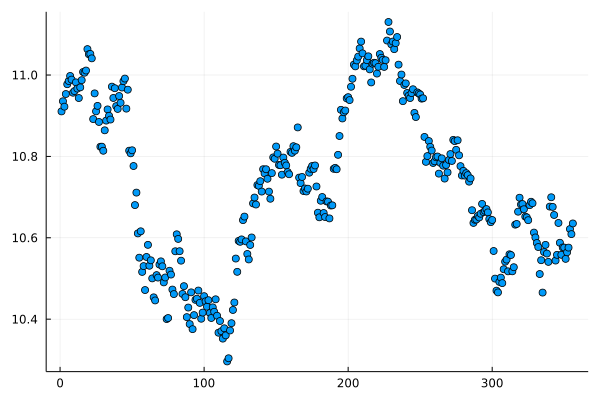

In [7]:
β=Array(zeros(3,1)); ## declarnado un vector pa guardar los coeficientes
Lny= log.(Y) #ecalando los precios
scatter(X,Lny, leg=false)






In [8]:


h(β,x)=β[1] .+ β[2].*x .- β[3].*x.^2 #defieniendo la forma de la función con la que pretendoi predecir
scatter(X,Lny, leg=true)
plot!(X-> h([0.1,0.1,0.1],X), extrema(X)..., lw=2, c=:red);

In [9]:
X;

In [10]:
using NLPModels
using JuMP
using NLPModelsJuMP
model = Model() #crea una lista de inputs para platear el problema de  minimos cuadrados nonlineal
@variable(model,β[1:3]) # Input de la forma de modelo y el tamaño del vector de coeficinetes que buscam
### modelo, el numero de equaciones normales a resolver, y el modelo aplicado a nuestros datos
@NLexpression(model, res[i=1:N[1]-7], β[1] + β[2]*X[i] - β[3]*X[i]^2 - Lny[i]) 
nls = MathOptNLSModel(model, res, name="distri Euler BTC  ")

## se puede ver que incluso se le pueden añadir restricciones a los problemas

┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1423
┌ Info: Precompiling NLPModelsJuMP [792afdf1-32c1-5681-94e0-d7bf7a5df49e]
└ @ Base loading.jl:1423


MathOptNLSModel
  Problem name: distri Euler BTC  
   All variables: ████████████████████ 3      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 356   
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 356   
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   1068  
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   6               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0  

In [11]:
### Generando los resultados generales
output=trunk(nls)
print(output)

Generic Execution stats
  status: first-order stationary
  objective value: 7.066600886937294
  primal feasibility: 0.0
  dual feasibility: 0.41363750004528815
  solution: [10.714288134793641  0.0004326017881818957  1.462746300906956e-6]
  iterations: 4
  elapsed time: 4.488692998886108


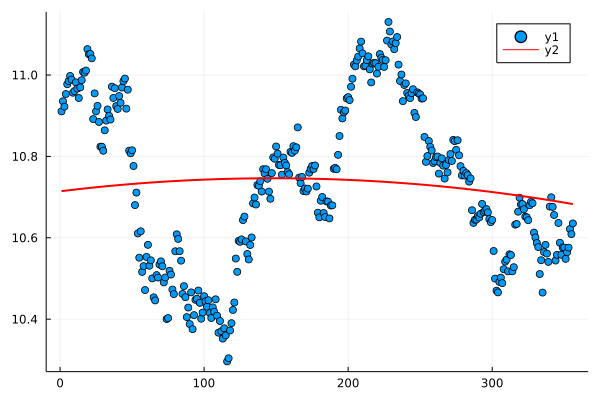

In [12]:
#Aqui ya tenemos un vetor optimo para el algoritmo y lo pintamos conel registro de puntos diarios
βC=output.solution
scatter(X,Lny, leg=true)
plot!(X-> h(βC,X), extrema(X)..., lw=2, c=:red)


In [13]:
βC

3-element Vector{Float64}:
 10.714288134793641
  0.0004326017881818957
  1.462746300906956e-6

testin the model for the next seven days

In [14]:

#aqui voy a completar el vector de datos inluyendo los de la semana más reciente para
#validar el modelo
BTCyear=zeros(N[1],1);
for i in 1:N[1]
    
    BTCyear[i,]=dataBitcoin."Close/Last"[N[1]-(i-1),]
end
BTCyear;
Xyear= Array((1:length(BTCyear))); #dias del año
BTCyear;
LnBTCyear= log.(BTCyear);

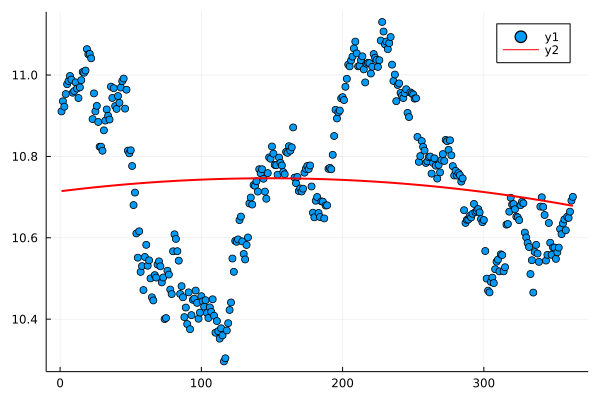

In [15]:
#Probar el modelo en los 363 días
scatter(Xyear,LnBTCyear, leg=true)
plot!(Xyear-> h(βC,Xyear), extrema(Xyear)..., lw=2, c=:red)


In [16]:
#### error####
norm(h(βC,Xyear)-LnBTCyear,2)

3.760491988557514

In [17]:
####intento con una elipse######

###ahora resuelvo el mismo problema pero con una elipse####
a=Array(zeros(5,1));
E(a,x,y)= a[1].*x.^2 .+ a[2].*y.^2 .+ a[3].*x.*y .+ a[4].*x .+ a[5].*y
scatter(X,Y, leg=false);

E([0.1,0.1,0.1,0.1,0.1],X,Y);
unos=50000*ones(N[1]-7,);


In [18]:
using NLPModels
using JuMP
using NLPModelsJuMP
using JSOSolvers
modelE = Model()
@variable(modelE,a[1:5])
@NLexpression(modelE, resE[i=1:N[1]-7], (a[1]*X[i]^2 + a[2]*Y[i]^2 + a[3]*X[i]*Y[i] + a[4]*X[i] + a[5]*Y[i]) - unos[i])
nlsE = MathOptNLSModel(modelE, resE, name=" elipse  ")
 

MathOptNLSModel
  Problem name:  elipse  
   All variables: ████████████████████ 5      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 356   
            free: ████████████████████ 5                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 356   
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   1780  
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   15              linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
     

In [19]:
outputE =trunk(nlsE)
# print(outputE)

"Execution stats: first-order stationary"

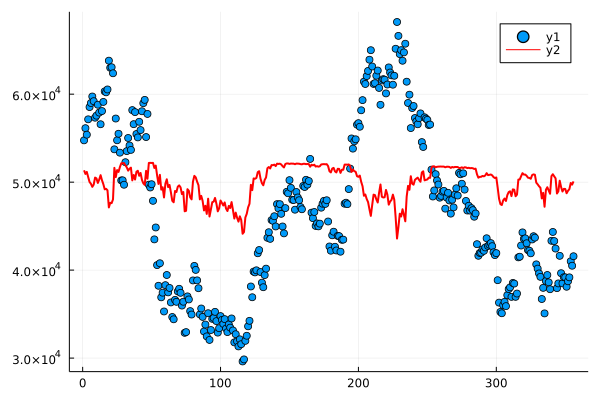

In [20]:
a=outputE.solution
scatter(X,Y)
plot!(X, E(a,X,Y), lw=2, c=:red)



In [21]:
err=norm2(E(a,X,Y)-unos)

LoadError: UndefVarError: norm2 not defined

In [22]:
#############################################################################
######################## 333333333##############################


# Vamos a resolver ahora usando el mismo modelo exponencial del inicio pero para la data de Oro, plata Oil:

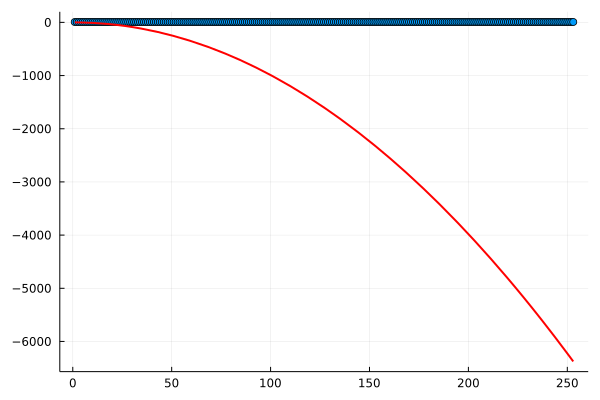

In [23]:
#tamaños de data

G=size(dataGold)[1]; #y sera el tamaño de las 3 muestras
GY=zeros(G,1);
OY=zeros(G,1);
DY=zeros(G,1);#Los vectores donde guardar      precios


for i in 1:G
    
GY[i]=dataGold."Close/Last"[G-(i-1),]
OY[i]=dataOil."Close/Last"[G-(i-1),]
DY[i]=dataSilver."Close/Last"[G-(i-1),]
end
X2 =Array(1 : length(GY));
#tomando logaritmo

LnG=log.(GY);
LnO=log.(OY);
LnD=log.(DY);

scatter( X2, LnG,
   
    
    leg=false);
plot!(X2-> h([0.1,0.1,0.1],X2), extrema(X2)..., lw=2, c=:red)




In [24]:
X2;

In [25]:
#####aplicado al data set de Gold
using NLPModels
using JuMP
using NLPModelsJuMP
modelG = Model()
@variable(modelG,β[1:3])
@NLexpression(modelG, resG[i=1:G], β[1] + β[2]*X2[i] - β[3]*X2[i]^2 - LnG[i])
nlsG = MathOptNLSModel(modelG, resG, name="distri Euler Gold  ")

MathOptNLSModel
  Problem name: distri Euler Gold  
   All variables: ████████████████████ 3      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 253   
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 253   
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   759   
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   6               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0 

In [26]:
outputG =trunk(nlsG)
print(outputG)

Generic Execution stats
  status: first-order stationary
  objective value: 0.08668986288122575
  primal feasibility: 0.0
  dual feasibility: 1.6823383655456492e-8
  solution: [7.508172895393324  -0.00046794271990307633  -2.6009081975831313e-6]
  iterations: 5
  elapsed time: 0.004066944122314453


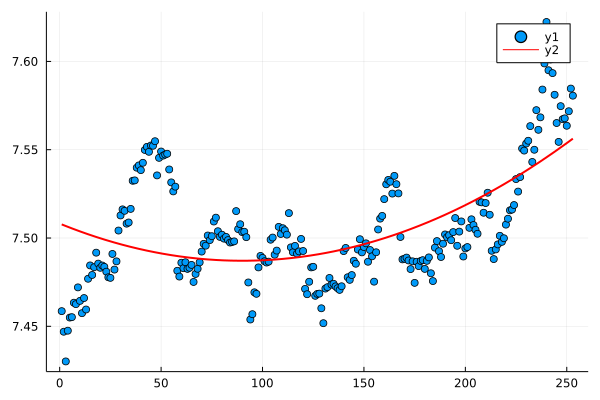

In [27]:
βG=outputG.solution
scatter(X2,LnG, leg=true)
plot!(X2-> h(βG,X2), extrema(X2)..., lw=2, c=:red)

In [28]:
####### Oil#######
#####aplicado al data set de Oil
modelO = Model()
@variable(modelO,β[1:3])
#@NLexpression(model, res[i=1:N[1]-7], 1 / (1+exp(-β[1]-β[2]*x[i]))-y[i]) 
@NLexpression(modelO, resO[i=1:G], β[1] + β[2]*X2[i] - β[3]*X2[i]^2 - LnO[i])
#nls = MathOptNLSModel(model, res, name="logistic")
nlsO = MathOptNLSModel(modelO, resO, name="distri Euler Oil  ")

MathOptNLSModel
  Problem name: distri Euler Oil  
   All variables: ████████████████████ 3      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 253   
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 253   
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   759   
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   6               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0  

In [29]:
outputO=trunk(nlsO);
print(outputO)

Generic Execution stats
  status: first-order stationary
  objective value: 0.567436308514523
  primal feasibility: 0.0
  dual feasibility: 1.3088957217352261e-5
  solution: [2.9418708802051317  0.0003627024076648805  -6.305979385557884e-6]
  iterations: 3
  elapsed time: 0.0013549327850341797


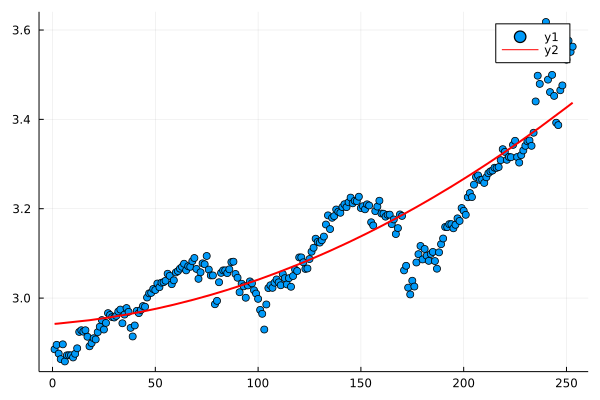

In [30]:
βO=outputO.solution
scatter(X2,LnO, leg=true)
plot!(X2-> h(βO,X2), extrema(X2)..., lw=2, c=:red)

In [31]:
####### Oil#######
#####aplicado al data set de Oil
modelD = Model()
@variable(modelD,β[1:3])
#@NLexpression(model, res[i=1:N[1]-7], 1 / (1+exp(-β[1]-β[2]*x[i]))-y[i]) 
@NLexpression(modelD, resD[i=1:G], β[1] + β[2]*X2[i] - β[3]*X2[i]^2 - LnD[i])
#nls = MathOptNLSModel(model, res, name="logistic")
nlsD= MathOptNLSModel(modelD, resD, name="distri Euler Silver  ")

MathOptNLSModel
  Problem name: distri Euler Silver  
   All variables: ████████████████████ 3      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 253   
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 253   
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   759   
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   6               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 

In [32]:
outputD=trunk(nlsD);
print(outputD)

Generic Execution stats
  status: first-order stationary
  objective value: 0.315281628140489
  primal feasibility: 0.0
  dual feasibility: 1.715213496783254e-5
  solution: [3.3307230944774364  -0.0019661470797944433  -5.641523732193975e-6]
  iterations: 3
  elapsed time: 0.0017008781433105469


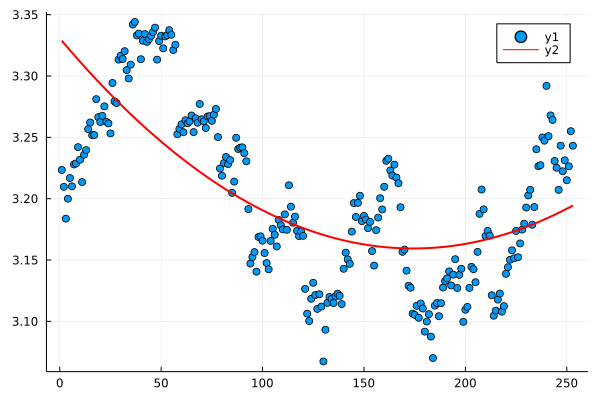

In [33]:
βD=outputD.solution
scatter(X2,LnD, leg=true)
plot!(X2-> h(βD,X2), extrema(X2)..., lw=2, c=:red)

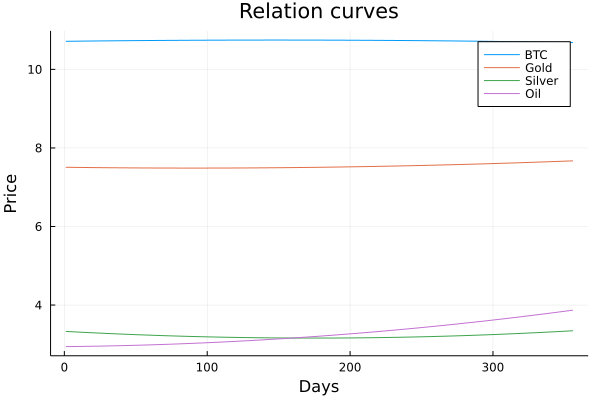

In [34]:


plot(X ,[h(βC,X),h(βG,X), h(βD,X), h(βO,X)],
    
    label = ["BTC" "Gold" "Silver" "Oil"],
    title = "Relation curves",
    xlabel= "Days",
    ylabel= "Price"
)


# Conclusiones

El modelo exponencial que usé no parece acomodarse demasiado bien a los datos. No es bueno para mostrar la relación de pendientes de los precios de nuestros comodities. La gran diferencia de valores respecto al BTC, y los comodities hace dificil su observación en este modelo escalado. La predicción de los ultimos días para el BTC, es aceptable.